In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

## 2a)

In [3]:
def elemental_stiffness_matrix(consts, h):
    alpha, b, c = consts
    return np.array([[alpha/h + b/2 + h*c/3, -alpha/h + b/2 + h*c/6],
                    [-alpha/h - b/2 + h*c/6, alpha/h - b/2 + h*c/3]])

def elemental_load(func, x1, x2, consts):
    h = x2 - x1
    f = np.zeros(2)
    f[0] = integrate.quad(lambda x: func(x, consts) * (x2 - x) / h, x1, x2)[0]
    f[1] = integrate.quad(lambda x: func(x, consts) * (x - x1) / h, x1, x2)[0]
    return f

In [14]:
def solve_system(Xk, func, consts):
    Mi = len(Xk)
    H = Xk[1:]-Xk[:-1]               # Element sizes
    Mk = Mi-1                        # Number of elements

    A = np.zeros((Mi,Mi))
    f = np.zeros((Mi))

    for k in range(0,Mk):
        Ak = elemental_stiffness_matrix(consts, H[k])
        fk = elemental_load(func, Xk[k], Xk[k+1], consts)
        A[k:k+2, k:k+2] += Ak
        f[k:k+2] += fk
    
    # Impose boundary condition
    # Dirichlet boundary conditions
    A[0,:] = 0;
    A[0,0] = 1
    f[0] = 0
    A[-1,:] = 0
    A[-1,-1] = 1
    f[-1] = 0

    U = np.linalg.solve(A,f)
    return U

In [22]:
def func_1(x, consts):
    alpha, b, c = consts
    return 2 * alpha + b * (1 - 2*x) + c * (x - x**2)

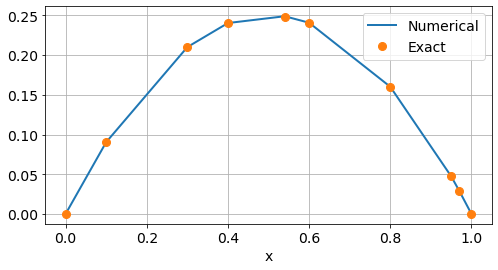

In [23]:
Xk = np.array([0, 0.1, 0.3, 0.4, 0.54, 0.6, 0.8, 0.95, 0.97, 1])

U = solve_system(Xk, func_1, [1,1,1])

plt.plot(Xk, U, Xk, Xk * (1-Xk), 'o')
plt.legend(['Numerical','Exact'])
plt.xlabel('x');


In [47]:
def func_2(x, consts):
    alpha, b, c = consts
    return 9 * np.pi**2 * alpha * np.sin(3*np.pi*x) + 3 * np.pi * b * np.cos(3*np.pi*x) + c* np.sin(3*np.pi * x)

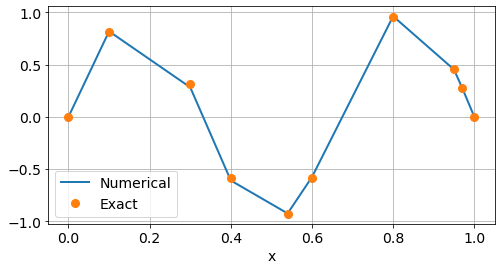

In [48]:
Xk = np.array([0, 0.1, 0.3, 0.4, 0.54, 0.6, 0.8, 0.95, 0.97, 1])

U = solve_system(Xk, func_2, [1,1,1])

plt.plot(Xk, U, Xk, np.sin(3*np.pi*Xk), 'o')
plt.legend(['Numerical','Exact'])
plt.xlabel('x');

## 2b)

In [51]:
def convergence(num_points, func, u_exact, consts):
    errors = np.zeros(num_points)
    Mis = 2**(3 + np.arange(num_points))
    hs = 1 / Mis
    for i in range(num_points):
        Xk = np.linspace(0, 1, Mis[i])
        U = solve_system(Xk, func, consts)
        U_exact = u_exact(Xk)
        errors[i] = np.linalg.norm(U-U_exact)
    return errors, hs

In [52]:
def u_exact_1(x):
    return x * (1 - x)

def u_exact_2(x):
    return np.sin(3 * np.pi * x)

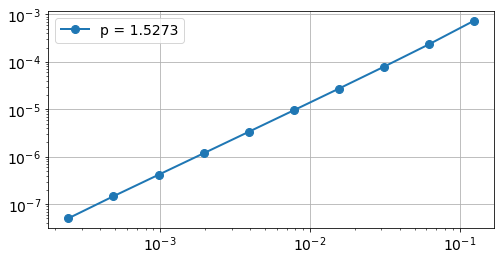

In [53]:
consts = [1, 1, 1]
errors_1, hs = convergence(10, func_1, u_exact_1, consts)

order = np.polyfit(np.log(hs),np.log(errors_1), 1)[0]

plt.loglog(hs, errors_1, '-o', label = 'p = {:.4f}'.format(order))
plt.legend()
plt.show()

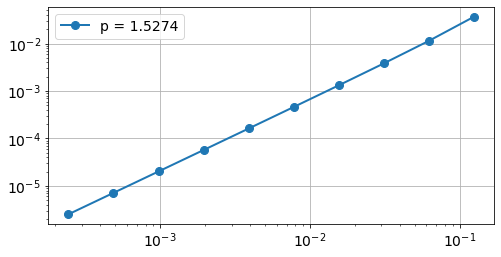

In [56]:
consts = [1, 1, 1]
errors_1, hs = convergence(10, func_2, u_exact_2, consts)

order = np.polyfit(np.log(hs),np.log(errors_1), 1)[0]

plt.loglog(hs, errors_1, '-o', label = 'p = {:.4f}'.format(order))
plt.legend()
plt.show()